In [42]:
import pandas as pd
import stats_la as s
import pipeline as pp
from nltk.corpus import stopwords
import tqdm
import importlib

In [11]:
def Clean_data(file, new_file):
    stopwords_lst = stopwords.words('english')
    pp.apply_pipeline(file, [
            # Clean content
            (pp.Clean_data(), 'content'),
            (pp.Tokenizer(), "content"),
            (pp.Remove_stopwords(stopwords_lst), "content"),
            (pp.Stem(), "content"),
            (pp.Combine_Content(), "content", "content_combined")
        ],
        new_file=new_file,
        progress_bar=True,
    )

Clean_data("../datasets/10k_cleaned.csv", "../datasets/10k_cleaned.csv")

100%|██████████| 10000/10000 [00:00<00:00, 104335.14it/s]


processed 200000 rows
finish time: 71.22300577163696


In [25]:
def count_and_plot(file, new_file, to_count : str):
    nc = s.counter(to_count)
    pp.apply_pipeline(file, [
    (nc, None, to_count + " count"),
    #(pp.Binary_labels(), "type")
    ], new_file=new_file
    )
    df = pp.apply_pipeline(new_file, [], 
        batch_size=10000,
        get_batch=True
    )
    true = df[df["type"] == True][to_count + " count"]
    false = df[df["type"] == False][to_count + " count"]
        
    s.boxplot(true, false, to_count + " count")

processed 200000 rows
finish time: 1.6364068984985352
Length 10000


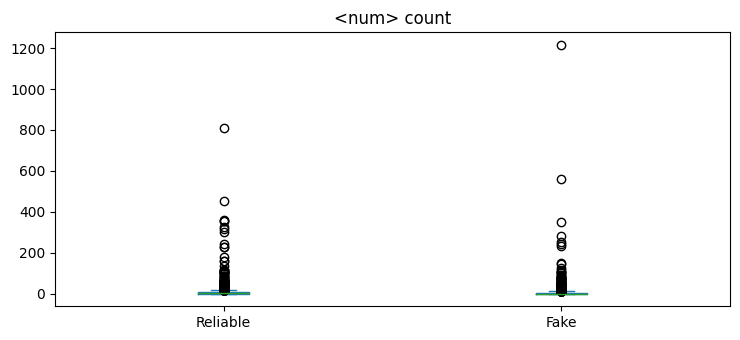

In [26]:
count_and_plot("../datasets/10k_cleaned.csv", "../datasets/10k_cleaned_num_count.csv", "<num>")

processed 200000 rows
finish time: 1.7177789211273193
Length 10000


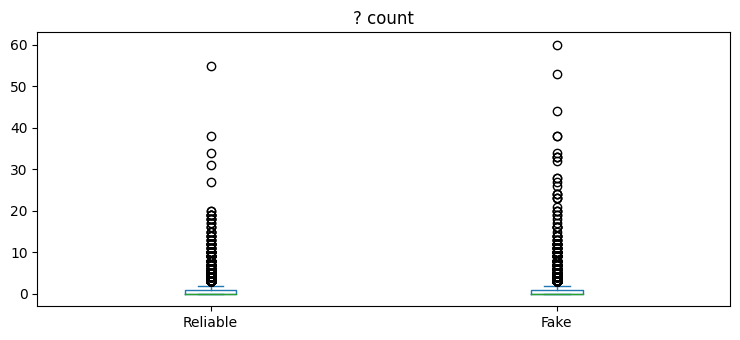

In [31]:
#Question mark count
count_and_plot("../datasets/10k_cleaned.csv", "../datasets/10k_cleaned_q_count.csv", "?")

processed 200000 rows
finish time: 1.4946880340576172
Length 10000


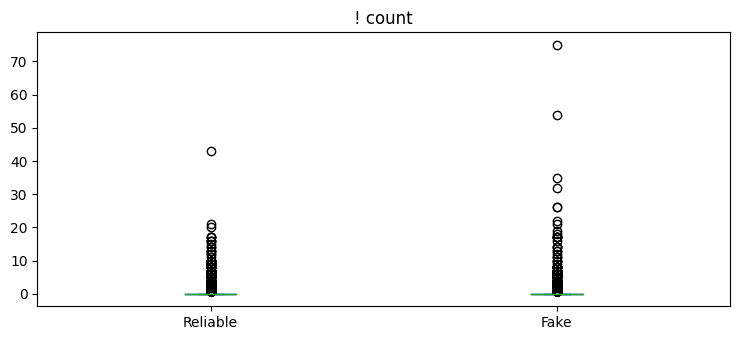

In [32]:
#Exclamation mark count
count_and_plot("../datasets/10k_cleaned.csv", "../datasets/10k_cleaned_q_count.csv", "!")

In [47]:
#Content length
def word_count(file, new_file):
    wc = s.word_count()
    pp.apply_pipeline(file, [
        (wc, None, "word count")
        #(pp.Binary_labels(), "type")
    ], new_file=new_file
    )
    df = pp.apply_pipeline(file, [], 
        batch_size=10000,
        get_batch=True
    )
    true = df[df["type"] == True]["word count"]
    false = df[df["type"] == False]["word count"]
        
    s.boxplot(true, false, "Word count")

#word_count("../datasets/100k-raw.csv", "../datasets/100k-raw-word-count.csv")